In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from pylab import *

import pickle
import keras
import loadnotebook
from helper import * 

/home/izza/installdir/miniconda3/envs/stock/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from helper.ipynb


In [2]:
demo_config = {6 : [1, 2, 3, 4, 5, 14, 15, 16, 33]}

df = get_data(config=demo_config, pure=True, refresh=False)
df_data = df
print(len(df_data))

helper.ipynb:615: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "#            '42_beam0', '42_beam32', '42_beam64', '42_beam96', '42_beam128',\n",


451263


# SNR Prediction 

In [3]:
snr_data = pd.DataFrame(df_data)
snr_data = snr_data[snr_data["PCI"].isin(whitelist_PCI)]
snr_data = snr_data.drop_duplicates()
snr_data = snr_data.dropna()
snr_data

,location_x,location_y,PCI,RSRP,RSRQ,SNR,Power_37,Power_38,Power_39,Power_40,...,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42,priority,set
0,662.0,112.0,41,-87.6,-6.1,25.5,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
1,662.0,112.0,41,-87.4,-6.1,23.8,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
2,662.0,112.0,41,-88.0,-6.1,28.0,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
3,662.0,112.0,41,-85.9,-5.8,24.9,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
4,662.0,112.0,41,-86.1,-6.1,26.0,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
5,662.0,112.0,41,-85.5,-6.4,24.0,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
6,662.0,112.0,41,-85.6,-6.2,24.5,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
7,662.0,112.0,41,-86.8,-6.1,26.1,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
8,662.0,112.0,41,-86.5,-6.3,26.7,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1
9,662.0,112.0,41,-86.3,-6.2,28.4,-2,3,0,5,...,183.967388,162.388423,83.110163,68.091295,-77.045918,-16.645038,-78.079261,11.725112,6,1


In [4]:
x_snr = snr_data.drop(["SNR"], axis=1)
y_snr = np.array(snr_data.SNR.values.tolist())
x_snr_train, x_snr_test, y_snr_train, y_snr_test = train_test_split(
    x_snr, y_snr, test_size=0.3, random_state=32)

## Data Visualization 

In [5]:
print_size_per_priority(demo_config, snr_data)

6 1 55970
6 2 48039
6 3 30275
6 4 44697
6 5 34015
6 14 45091
6 15 42857
6 16 37654
6 33 42903


In [6]:
x_cut = 50  
y_cut = 100 
lon_list = [int(x-x_cut) for x in snr_data["location_x"]]
lat_list = [int(y-y_cut) for y in snr_data["location_y"]]
snr_list = snr_data["SNR"].astype('int32')

snr_summary = summary_based_on_location(lat_list, lon_list, snr_list)
snr_summary = summary_dict(snr_summary, np.array)

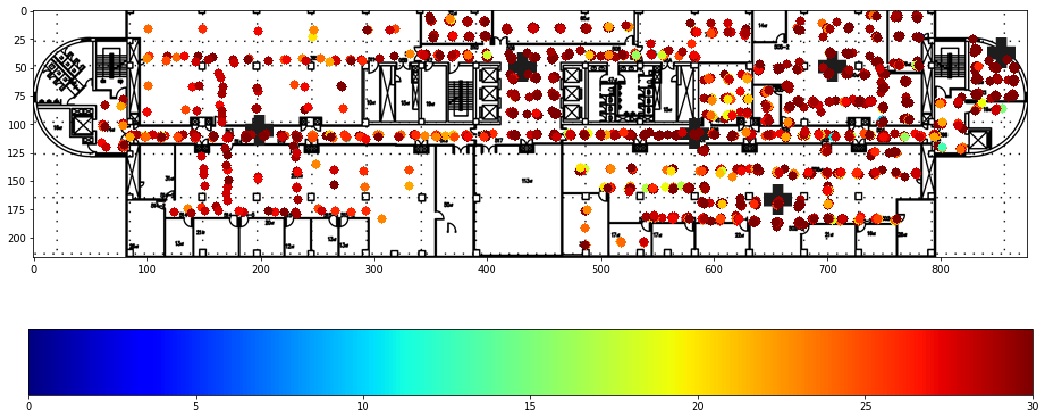

In [7]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

normalize_snr_mean = matplotlib.colors.Normalize(vmin=0, vmax=30)
snr_mean = summary_dict(snr_summary, np.max)
x_list, y_list, snr_mean_list = summary_dict_to_list(snr_mean)
colors_snr_mean = [cmap(normalize_snr_mean(value))[:3] for value in snr_mean_list]
colors_snr_mean = [[int(x*255) for x in value] for value in colors_snr_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(crop, x_list, y_list, colors_snr_mean, 
                               cmap, normalize_snr_mean, None, adjustment=False)

## Generate all to be predicted data 

In [8]:
x_coord_list = []
y_coord_list = []
pci_list = []
for lon in range(0, crop.shape[1]) :
    for lat in range(0, crop.shape[0]) :
        x_coord_list.append(x_cut + lon)
        y_coord_list.append(y_cut + lat)
        
predicted_set_config = {6 : [1, 2, 3, 4, 5, 14, 15, 16, 33]}

In [9]:
all_pred_snr_dict = load_from_pickle("predicted_rsrq_lgbm")
all_x_snr_dict = generate_predicted_data_snr(snr_data, predicted_set_config, 
                                             x_coord_list, y_coord_list, all_pred_snr_dict, refresh=False)

helper.ipynb:765: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "def generate_predicted_data_snr(snr_data, predicted_set_config, \n",


In [10]:
all_x_snr_dict[(6, 1)]

,location_x,location_y,PCI,RSRP,RSRQ,Power_37,Power_38,Power_39,Power_40,Power_41,...,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42,priority,set
0,50,100,37,-103.088966,-6.364569,-2,3,0,5,-1,...,434.883893,667.282549,87.244934,86.018505,61.733594,79.410016,83.397920,75.151548,6,1
1,50,101,37,-103.088966,-6.364569,-2,3,0,5,-1,...,434.770054,667.026986,87.312031,86.099506,61.957409,79.505004,83.528830,75.234577,6,1
2,50,102,37,-103.088966,-6.364569,-2,3,0,5,-1,...,434.658487,666.772825,87.379135,86.180523,62.182159,79.600050,83.659808,75.317669,6,1
3,50,103,37,-103.088966,-6.364569,-2,3,0,5,-1,...,434.549192,666.520067,87.446247,86.261556,62.407844,79.695154,83.790853,75.400825,6,1
4,50,104,37,-103.483993,-6.516818,-2,3,0,5,-1,...,434.442171,666.268715,87.513365,86.342603,62.634461,79.790315,83.921963,75.484043,6,1
5,50,105,37,-103.483993,-6.516818,-2,3,0,5,-1,...,434.337426,666.018769,87.580491,86.423666,62.862010,79.885533,84.053137,75.567324,6,1
6,50,106,37,-103.483993,-6.504098,-2,3,0,5,-1,...,434.234959,665.770231,87.647623,86.504742,63.090489,79.980808,84.184373,75.650668,6,1
7,50,107,37,-103.483993,-6.504098,-2,3,0,5,-1,...,434.134772,665.523103,87.714761,86.585833,63.319897,80.076138,84.315671,75.734074,6,1
8,50,108,37,-103.483993,-6.504098,-2,3,0,5,-1,...,434.036865,665.277386,87.781906,86.666937,63.550232,80.171525,84.447029,75.817541,6,1
9,50,109,37,-103.483993,-6.504098,-2,3,0,5,-1,...,433.941240,665.033082,87.849057,86.748054,63.781492,80.266966,84.578445,75.901070,6,1


## Tensorflow 

In [44]:
import tensorflow as tf 

def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features.to_dict('list')), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels=None, batch_size=None):
    features = features.to_dict('list')

    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    return dataset.make_one_shot_iterator().get_next()

def regression_model_fn(features, labels, mode, params):
    net = tf.feature_column.input_layer(features, params["feature_columns"])
    net = params['model'](net, params)
    
    #predictions
    predictions = tf.squeeze(net, 1)

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode, predictions={"predictions": predictions})

    average_loss = tf.losses.absolute_difference(labels, predictions)

    batch_size = tf.shape(labels)[0]
    total_loss = tf.to_float(batch_size) * average_loss

    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = params.get("optimizer", tf.train.AdamOptimizer)
        optimizer = optimizer(params.get("learning_rate", None))
        train_op = optimizer.minimize(
            loss=average_loss, global_step=tf.train.get_global_step())

        return tf.estimator.EstimatorSpec(
            mode=mode, loss=total_loss, train_op=train_op)

    # In evaluation mode we will calculate evaluation metrics.
    assert mode == tf.estimator.ModeKeys.EVAL

    # Calculate root mean squared error
    rmse = tf.metrics.root_mean_squared_error(labels, predictions)

    # Add the rmse to the collection of evaluation metrics.
    eval_metrics = {"rmse": rmse}

    return tf.estimator.EstimatorSpec(mode=mode, loss=total_loss, eval_metric_ops=eval_metrics)

In [46]:
def get_linear_feature_column(name) :
    if 'Distance' in name or 'Angle' in name or 'RSRP' in name  or 'RSRQ' in name :
        return tf.feature_column.numeric_column(
            key=name, shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
    else :
        return tf.feature_column.numeric_column(
            key=name, shape=(1,), default_value=None, dtype=tf.int32, normalizer_fn=None)

linear_feature_set = {str(x):get_linear_feature_column(str(x)) for x in x_snr_train.columns}

f_location = tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=["location_x", "location_y"], hash_bucket_size=50000, hash_key=None), 2, combiner='sqrtn')

f_pci = tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_vocabulary_list(
    key="PCI",vocabulary_list=snr_data.PCI.unique(), dtype=tf.int64), len(whitelist_PCI))

f_power = tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=["Power_" + str(bs) for bs in bs_location], hash_bucket_size=25, hash_key=None), 
                                             len(bs_location), combiner='sum')
    
f_beam = {"beam"+str(bs): tf.feature_column.embedding_column(tf.feature_column.crossed_column(
    keys=[str(bs)+"_beam0", str(bs)+"_beam32", str(bs)+"_beam64", str(bs)+"_beam96", str(bs)+"_beam128"], 
    hash_bucket_size=1000, hash_key=None), 10, combiner='sum') for bs in bs_location}

f_distance_boundaries = {str(bs): tf.feature_column.embedding_column(tf.feature_column.bucketized_column(
    linear_feature_set["Distance_" + str(bs)], 
    boundaries=[50, 100, 150, 200]), len(bs_location)) for bs in bs_location}

f_angle_boundaries = {str(bs): tf.feature_column.embedding_column(tf.feature_column.bucketized_column(
    linear_feature_set["Angle_" + str(bs)], 
    boundaries=[-135, -90, -45, 0, 45, 90, 135]), len(bs_location)) for bs in bs_location}

# 4.9 3.7
semi_linear_feature_set = {**linear_feature_set, **{"location" : f_location, "PCI" : f_pci}}

# 4.9 3.8
semi_linear_2_feature_set = {**linear_feature_set,
                             **f_beam,
                             **{"location" : f_location, 
                                "PCI" : f_pci, 
                                "power" : f_power}}

# 4.8 3.9
semi_linear_3_feature_set = {**linear_feature_set,
                             **f_beam,
                             **f_distance_boundaries, 
                             **f_angle_boundaries, 
                             **{"location" : f_location, 
                                "PCI" : f_pci, 
                                "power" : f_power}}

# Tensorflow NN 

In [47]:
def nn_model(net, params) :
    counter = 0
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)
        net = tf.layers.batch_normalization(net, momentum=0.9)
        
        counter += 1
        if counter % 2 == 0 :
            net = tf.layers.dropout(net, rate=0.2)
    logits = tf.layers.dense(net, 1, activation=None)
    return logits

In [48]:
nn_regressor = tf.estimator.Estimator(
    model_dir="../model/snr/tensor_nn/semi_linear_feature_set",
    model_fn=regression_model_fn,
    config=tf.estimator.RunConfig(log_step_count_steps=2000),
    params={
        'feature_columns': list(semi_linear_feature_set.values()),
        'hidden_units': [32, 64, 128, 64, 16, 8],
        'model' : nn_model,
        'learning_rate': 0.001,
        'optimizer': tf.train.AdamOptimizer,
        'model' : nn_model
    })

INFO:tensorflow:Using config: {'_model_dir': '../model/snr/tensor_nn/semi_linear_feature_set', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 2000, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcab0fe0780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
nn_regressor.train(
    input_fn=lambda:train_input_fn(x_snr_train, y_snr_train, 32),
    steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt.
INFO:tensorflow:loss = 134.24765, step = 1
INFO:tensorflow:global_step/sec: 506.132
INFO:tensorflow:loss = 83.72737, step = 2001 (3.952 sec)
INFO:tensorflow:global_step/sec: 584.085
INFO:tensorflow:loss = 69.68197, step = 4001 (3.424 sec)
INFO:tensorflow:global_step/sec: 579.493
INFO:tensorflow:loss = 60.1818, step = 6001 (3.451 sec)
INFO:tensorflow:global_step/sec: 585.395
INFO:tensorflow:loss = 65.66333, step = 8001 (3.417 sec)
INFO:tensorflow:Saving checkpoints for 10000 into ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt.
INFO:tensorflow:Loss for final step: 79.55313.


In [50]:
nn_regressor.evaluate(
    input_fn=lambda:eval_input_fn(x_snr_test, np.array(y_snr_test, dtype=float32), 700))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-07:03:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-25-07:03:28
INFO:tensorflow:Saving dict for global step 10000: global_step = 10000, loss = 1345.5646, rmse = 3.5948322


{'loss': 1345.5646, 'rmse': 3.5948322, 'global_step': 10000}

In [83]:
nn_est_tensor_predictions = {(p,s):nn_regressor.predict(
    input_fn=lambda:eval_input_fn(all_x_snr_dict[(p,s)], batch_size=10)) for p,s in all_x_snr_dict}

all_y_snr_tensor_nn = {}
for key in nn_est_tensor_predictions :
    all_y_snr_tensor_nn[key] = [p['predictions'] for p in nn_est_tensor_predictions[key]]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../model/snr/tensor_nn/semi_linear_feature_set/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was fina

In [84]:
for set_val in all_y_snr_tensor_nn :
    y_pred = all_y_snr_tensor_nn[set_val]
    print(str(set_val) + ":" + str(np.sum(y_pred)))

(1, 1):1101654.5
(2, 1):1101654.5
(3, 1):1101654.5
(4, 1):1101654.5


# Keras MLP

In [ ]:
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

input_dims = len(x_rsrp_train.columns)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dims))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(np.array(x_rsrp_train.values.tolist()), y_rsrp_train, epochs=100, batch_size=512)

In [ ]:
score = model.evaluate(x_rsrp_test, y_rsrp_test, batch_size=128)
score

In [ ]:
all_y_rsrp_keras = {set_val:model.predict(all_x_rsrp_dict[set_val]) for set_val in all_x_rsrp_dict}

In [ ]:
all_y_rsrp_keras_mlp = {set_val:np.argmax(all_y_rsrp_keras[set_val], axis=1) for set_val in all_y_rsrp_keras}

In [ ]:
for set_val in all_y_rsrp_keras_mlp :
    y_pred = all_y_rsrp_keras_mlp[set_val]
    print(str(set_val) + ":" + str(np.sum(y_pred)))

# XGBoost 

In [11]:
from xgboost import XGBRegressor
import sklearn.metrics as m

xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=True, subsample=1)

In [12]:
xgb_model.fit(x_snr_train, y_snr_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
y_snr_pred = xgb_model.predict(x_snr_test)
predictions = [round(value) for value in y_snr_pred]
mae = m.mean_absolute_error(y_snr_test, predictions)
print("Mae", mae)

Mae 1.767863976723663


In [14]:
all_y_snr_xgboost = {set_val:xgb_model.predict(all_x_snr_dict[set_val]) for set_val in all_x_snr_dict}

# LGBM 

In [15]:
import lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
lgbm_model.fit(x_snr_train, y_snr_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
y_snr_pred = lgbm_model.predict(x_snr_test)
predictions = [round(value) for value in y_snr_pred]
mae = m.mean_absolute_error(y_snr_test, predictions)
print("Mae", mae)

Mae 1.3392858079003243


In [18]:
all_y_snr_lgbm = {set_val:lgbm_model.predict(all_x_snr_dict[set_val]) for set_val in all_x_snr_dict}

## Visualize Prediction 

In [19]:
all_y_snr_dict = {"lgbm":all_y_snr_lgbm,
                  "xgboost":all_y_snr_xgboost}

In [20]:
background = old_origin_img[y_cut:318, x_cut:927]
background = cv2.cvtColor(background, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
normalize_snr = matplotlib.colors.Normalize(vmin=0, vmax=30)

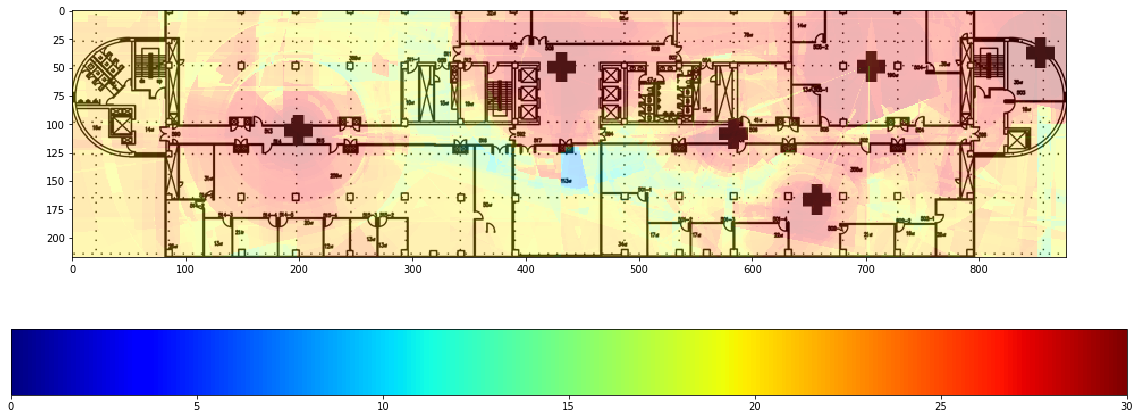

In [26]:
p, s = 6, 1
model_name = "lgbm"
all_y_snr = all_y_snr_dict[model_name]
snr_pred = all_y_snr[(p, s)]
snr_pred = [cmap(normalize_snr(value))[:3] for value in snr_pred]
snr_pred = [[int(x*255) for x in value] for value in snr_pred]
    
a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, snr_pred, 
                                 cmap, normalize_snr, filename=None,
                                 size=2, figsize=(20,10), adjustment=False)

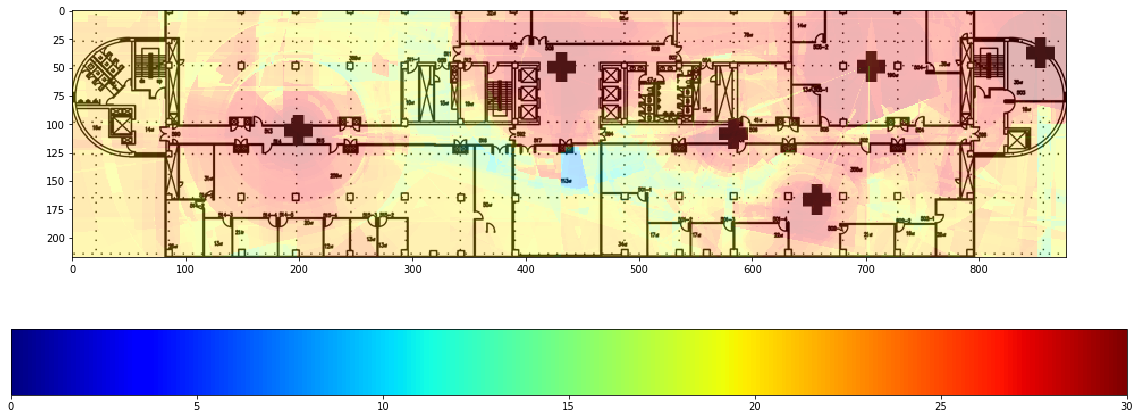

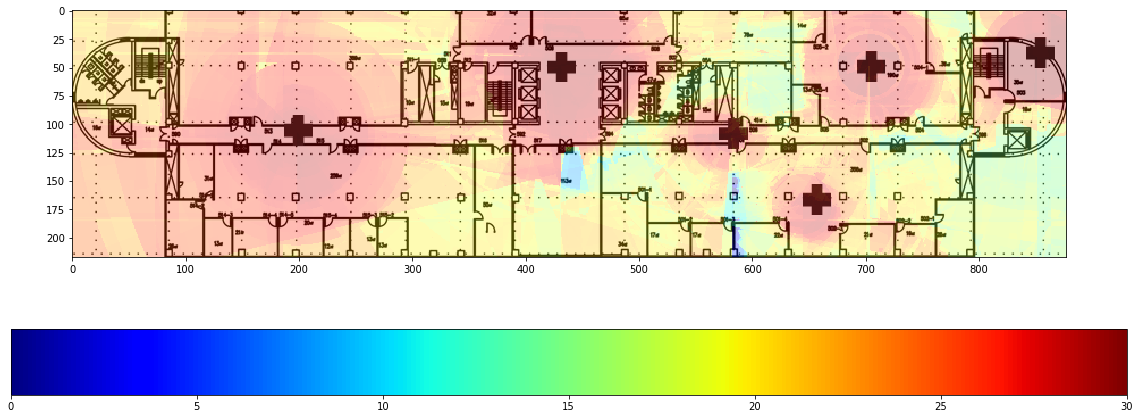

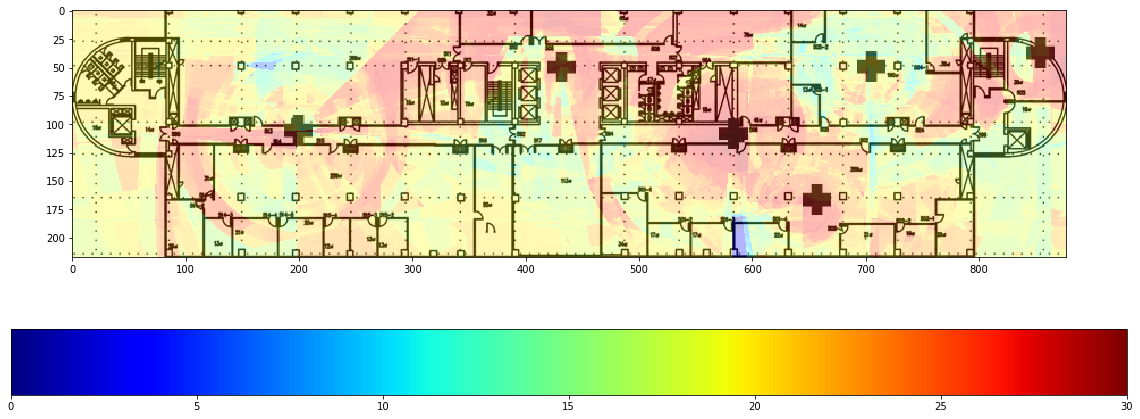

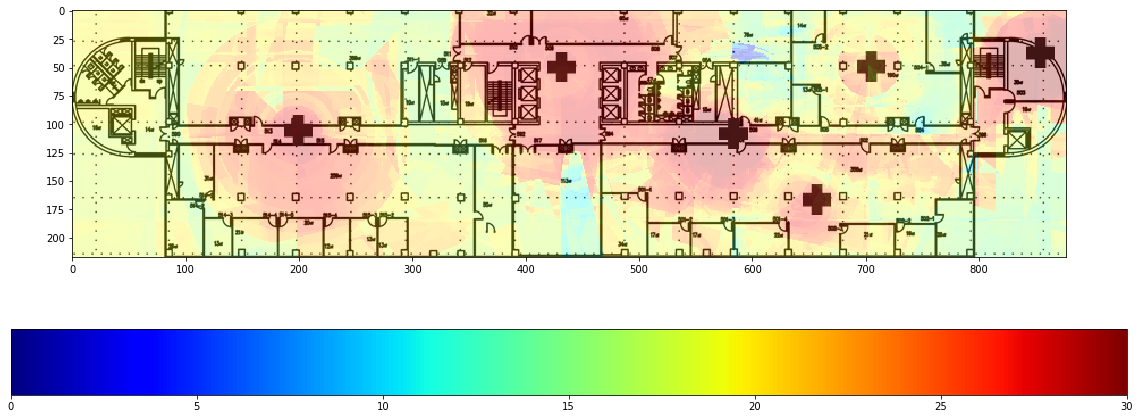

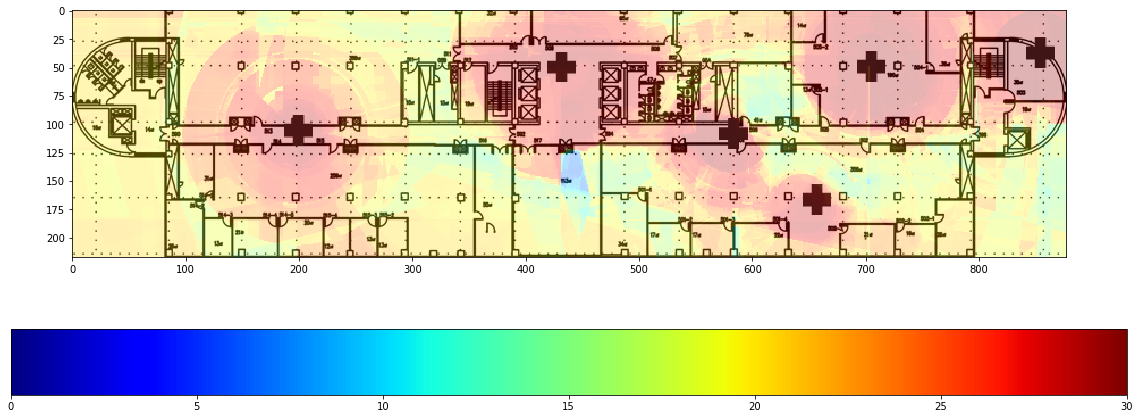

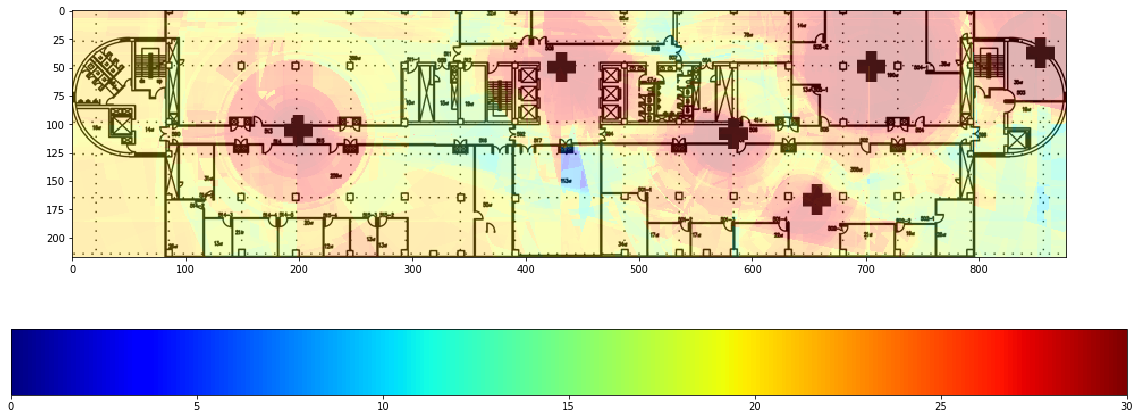

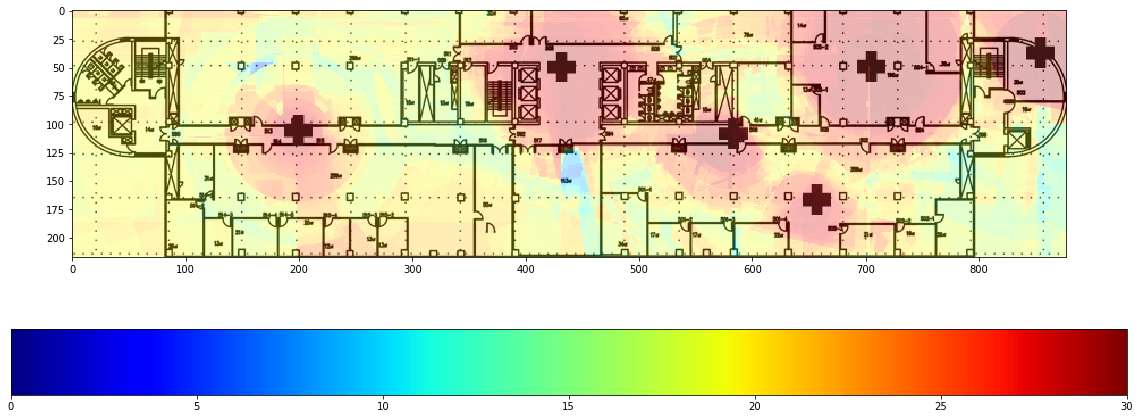

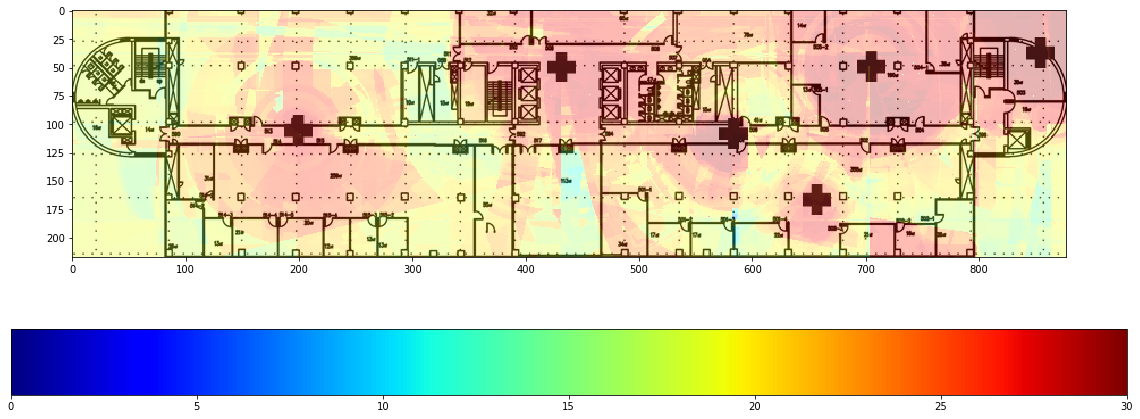

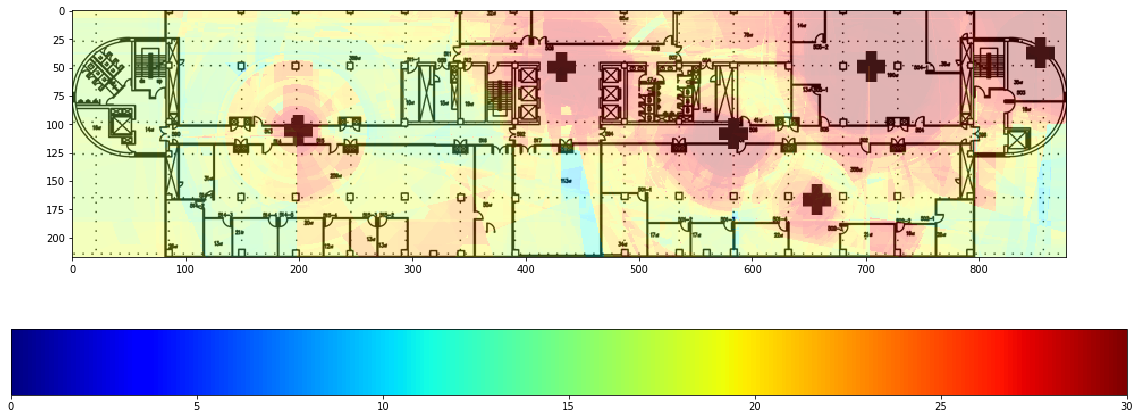

In [27]:
for p in predicted_set_config :
    for s in predicted_set_config[p] :
        path = "../results/predicted/snr/%s/priority_%d_set_%d.png" % (model_name, p, s)
        all_y_snr = all_y_snr_dict[model_name]
        snr_pred = all_y_snr[(p, s)]
        snr_pred = [cmap(normalize_snr(value))[:3] for value in snr_pred]
        snr_pred = [[int(x*255) for x in value] for value in snr_pred]
        a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, snr_pred,
                                         cmap, normalize_snr, filename=path,
                                         size=2, figsize=(20,10), adjustment=False)

In [72]:
all_pred_snr_dict = {}
for m in all_y_snr_dict : 
    for k in all_x_snr_dict :
        x_snr = all_x_snr_dict[k]
        x_snr["pred_SNR"] = all_y_snr_dict[m][k]
        x_snr = x_snr[["location_x", "location_y", "PCI", "RSRP", "RSRQ", "pred_SNR"]]
        all_pred_snr_dict[k] = x_snr
    
    save_to_pickle(all_pred_snr_dict, "predicted_snr_" + m)

1051171.8661136627


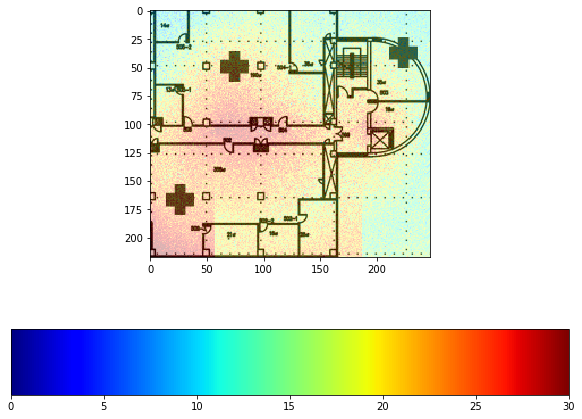

In [74]:
saved_all_y_snr = load_from_pickle("predicted_snr_tensor_nn")

all_y_snr = saved_all_y_snr
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
p, s = 1, 1

snr_pred = all_y_snr[(p, s)]["pred_SNR"]
snr_pred = [cmap(normalize_snr(value))[:3] for value in snr_pred]
snr_pred = [[int(x*255) for x in value] for value in snr_pred]

a=visualize_all_location_heatmap(background, x_coord_view, y_coord_view, snr_pred, 
                                 cmap, normalize_snr, filename=None,
                                 size=2, figsize=(10,10), adjustment=False)